# Notes

In [17]:
import pandas as pd
import geopandas as geo

In [24]:
folder = '/home/minigonche/Dropbox/Projects/malaria_mining/data/pipeline_data/raw/geo/countries/'
col = geo.read_file(folder + 'colombia/colombia.shp')
ecu = geo.read_file(folder + 'ecuador/ecuador.shp')
ven = geo.read_file(folder + 'venezuela/venezuela.shp')
pan = geo.read_file(folder + 'panama/panama.shp')
per = geo.read_file(folder + 'peru/peru.shp')
bra = geo.read_file(folder + 'brasil/brasil.shp')

other = [ecu,ven,pan, per, bra]
other_names = ['Ecuador', 'Venezuela', 'Panama', 'Peru', 'Brazil']


buffer = 25 # Km
manipulation_geoemtry = 'EPSG:3395'
plot_geoemtry = 'WGS84'


In [29]:

values = []
geometries = []
for i in range(len(other)):
    o = other[i]
    new_geo = col.geometry.to_crs(manipulation_geoemtry).buffer(buffer*1000).intersection(o.geometry.to_crs(manipulation_geoemtry)).to_crs(plot_geoemtry).values[0]
    values.append({'frontera': other_names[i]})
    geometries.append(new_geo)
    

fronteras = geo.GeoDataFrame(values, geometry=geometries, crs=plot_geoemtry)
fronteras


,frontera,geometry
0,Ecuador,"MULTIPOLYGON (((-75.46894 -0.31011, -75.47533 ..."
1,Venezuela,"MULTIPOLYGON (((-71.91876 11.27500, -71.92148 ..."
2,Panama,"MULTIPOLYGON (((-78.04859 7.43029, -78.04776 7..."
3,Peru,"POLYGON ((-70.18898 -4.32109, -70.19528 -4.311..."
4,Brazil,"MULTIPOLYGON (((-66.67052 1.04202, -66.68646 1..."


<AxesSubplot:>

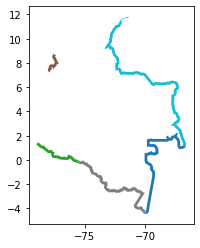

In [34]:
fronteras['id'] = range(fronteras.shape[0])
fronteras.plot(column = 'frontera')

In [35]:
fronteras.to_file('/home/minigonche/Dropbox/Projects/malaria_mining/data/pipeline_data/raw/geo/frontiers/frontiers.shp', index = False)